In [7]:
import numpy as np
from scipy import stats 

data = np.array([0, 70, 85, 88, 92, 100, 120, 180]) 

mean = 92.14

std_dev = 12.46

z_scores = (data - mean) / std_dev 

print(z_scores) 

threshold = 2 

outliers = np.where(np.abs(z_scores) > threshold) 

print("Outliers:", data[outliers]) 

[-7.39486356 -1.77688604 -0.57303371 -0.33226324 -0.01123596  0.63081862
  2.23595506  7.05136437]
Outliers: [  0 120 180]


In [8]:
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1 
print(q1)
print(q3)

threshold = 1.5 

lf = q1 - threshold*iqr 
uf = q3 + threshold*iqr
print("Lower Fence", lf) 
print("Upper Fence", uf) 

outliers = data [((data < q1 - threshold*iqr ) | (data > q3 + threshold*iqr ))]
print("Outliers:", outliers) 


81.25
105.0
Lower Fence 45.625
Upper Fence 140.625
Outliers: [  0 180]


In [10]:
from sklearn.neighbors import LocalOutlierFactor 

X = np.array ([[1,2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

#Define LOF Parameters 
n_neighbors = 5 #number of neighbors to consider for outlier detection 
contamination = 0.1 #expected proportion of outliers in the dataset (confidence interval)  


#Inicialize and fit the LOF model 
lof_model = LocalOutlierFactor (n_neighbors = n_neighbors, contamination = contamination) 
outlier_scores = lof_model.fit_predict(X) 

#Identify outliers (where the LOF score is less than 0) 
outlier_indices = np.where(outlier_scores == -1) [0]
outliers = X[outlier_indices]

print("Outlier Indices:", outlier_indices) 
print("Outliers:", outliers) 

Outlier Indices: [2]
Outliers: [[5. 8.]]


In [11]:
#Outlier detection using Isolation Forest 

from sklearn.ensemble import IsolationForest 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt 



In [12]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [13]:
#inicialize and fit the model 
clf = IsolationForest(contamination=0.1) 
clf.fit(X_train)

IsolationForest(contamination=0.1)

In [15]:
#predict the anomalies in the data 
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test) 
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1]
[ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1]


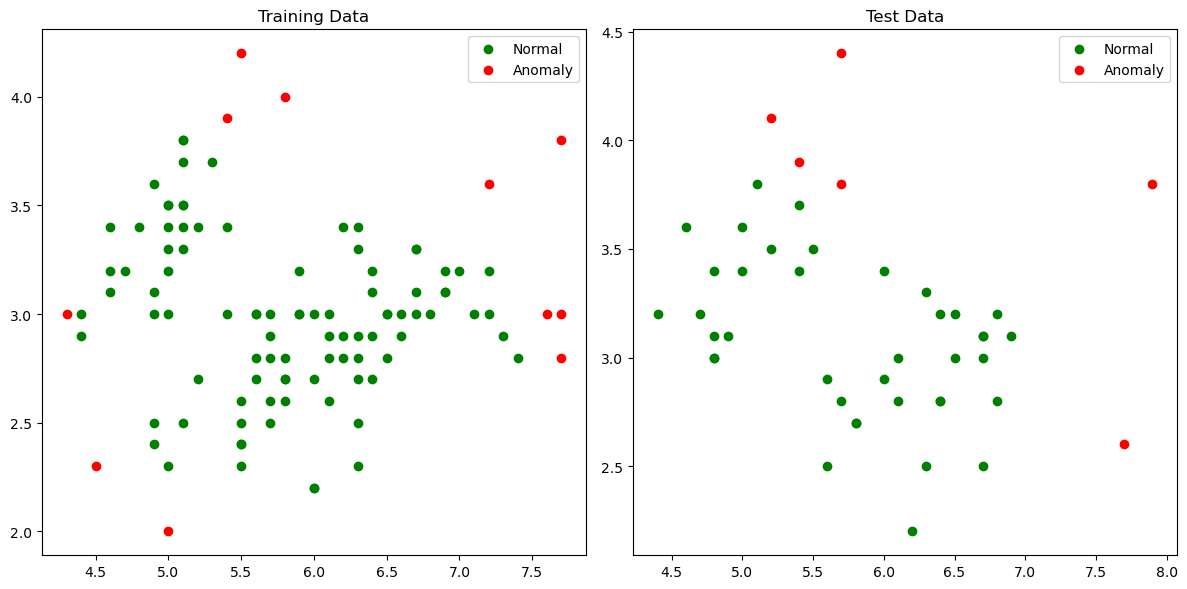

In [16]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2): 
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    #scatter plot for the first set of data 
    
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    
    #scatter plot for the second set of data 
    
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

#scatter plots 
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')



In [ ]:
#Once-Class SVM for Outlier Detection 
from sklearn import svm 

#Generation a simple dataset 
np.random.seed(0)
X = np.random.randn(100, 2) #two features 
X[:8] += 4 #add some outliers 
y = np.ones(100) #all points are considered outliers 
y[:8] = -1 #first 10 points are outliers 

#fit one-class svm model 
clf = svm.ONeClassSVM(nu=0.1m kernel='rbf', gamma=0.1)
clf.fit(X)

#predict outliers 
pred = clf.preduct(X) 

#plotting the data points and decision boundary 
xx, yy = np.meshgrid(np.linspace(-8, 8, 500), np.linspace(-8, 8, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.lin